In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import histfit as hf
import math

In [2]:
filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1__0.npy'

coll=ca.NPYreader(filename,True).get_event()
for i in range(5,30,5):
        filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/AnalisiBig3/228Th-grafico-tesi-im260421_1__'+str(i)+'.npy'
        temp=ca.NPYreader(filename,False).get_event()

        if(i==5):
            coll_tot=temp
        else:
            coll_tot=coll_tot+temp
            del(temp)
        #print('opened '+str(i))

print('coll events: '+str(coll.n_trace))
print('coll_tot events: '+str(coll_tot.n_trace))

/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1
coll events: 136889
coll_tot events: 3559114


In [3]:
nbits=14
nbins=2**14-1
calVec = [-0.090383+ 0.20574*i for i in range(2**14+1)]

<IPython.core.display.Javascript object>


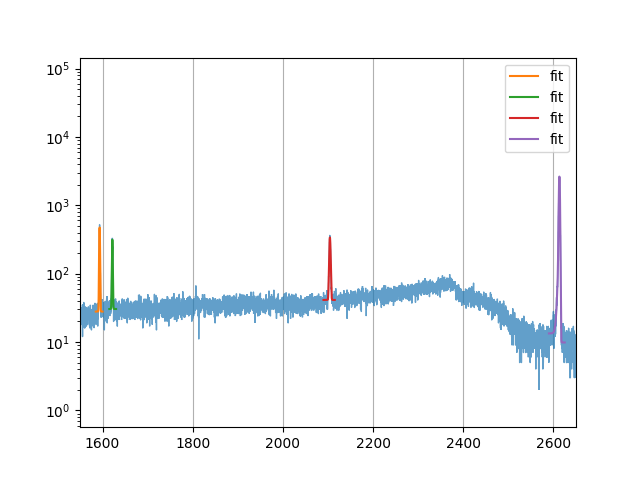

(1550.0, 2650.0)

In [4]:
plt.figure()
c,e,p=plt.hist(coll_tot.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')
plt.xlim(1550,2650)

In [5]:
#Fit Double escape peak 208Tl
peak = hf.HistogramFitter(c, e)
xlim_DEP = 1585,1600

shape = 'gaus'
bkg = 'const'

pars_DEP = {'ngaus': 10**4,
        'mu'   : 1593,
        'sigma': 2,
        'ntail': 10**3,
        'ttail': 2.5,
        'cstep': 50,
        'p0'   : 10**1}
    
peak.set_model((shape,bkg), xlim=xlim_DEP, initpars=pars_DEP)
pars_opt_DEP=peak.fit()['opt']
hwhm_DEP= math.sqrt(2* math.log(2))*pars_opt_DEP['sigma'][0]
print(pars_opt_DEP['sigma'])
peak.plot_fit()

(0.8283667663737094, 0.012294830317781384)


In [6]:
#Fit full energy peak 212Bi
peak = hf.HistogramFitter(c, e)
xlim_FEP_Bi = 1615,1630

shape = 'gaus'
bkg = 'const'

pars_FEP_Bi = {'ngaus': 10**4,
        'mu'   : 1622,
        'sigma': 2,
        'ntail': 10**3,
        'ttail': 2.5,
        'cstep': 50,
        'p0'   : 10**1}
    
peak.set_model((shape,bkg), xlim=xlim_FEP_Bi, initpars=pars_FEP_Bi)
pars_opt_FEP_Bi=peak.fit()['opt']
hwhm_FEP_Bi= math.sqrt(2*math.log(2))*pars_opt_FEP_Bi['sigma'][0] 
peak.plot_fit()
print(pars_opt_FEP_Bi['mu'][0])

1621.681673955118


In [7]:
#Fit Single escape peak 208Tl
peak = hf.HistogramFitter(c, e)
xlim_SEP = 2090,2115

shape = 'gaus'
bkg = 'const'

pars_SEP = {'ngaus': 10**4,
        'mu'   : 2104,
        'sigma': 2,
        'ntail': 10**3,
        'ttail': 2.5,
        'cstep': 50,
        'p0'   : 10**1}
    
peak.set_model((shape,bkg), xlim=xlim_SEP, initpars=pars_SEP)
pars_opt_SEP=peak.fit()['opt']
hwhm_SEP= math.sqrt(2*math.log(2))*pars_opt_SEP['sigma'][0] 
peak.plot_fit()

In [8]:
#Fit Full energy peak 208Tl
peak = hf.HistogramFitter(c, e)
xlim_FEP_208Tl = 2590,2625

shape = 'hyper'
bkg = 'const'

pars_FEP_208Tl = {'ngaus': 10**4,
        'mu'   : 2615,
        'sigma': 2,
        'ntail': 10**3,
        'ttail': 2.5,
        'cstep': 50,
        'p0'   : 10**1}
    
peak.set_model((shape,bkg), xlim=xlim_FEP_208Tl, initpars=pars_FEP_208Tl)
pars_opt_FEP_208Tl=peak.fit()['opt']
hwhm_FEP_208Tl= math.sqrt(2*math.log(2))*pars_opt_FEP_208Tl['sigma'][0]  
peak.plot_fit()

<IPython.core.display.Javascript object>


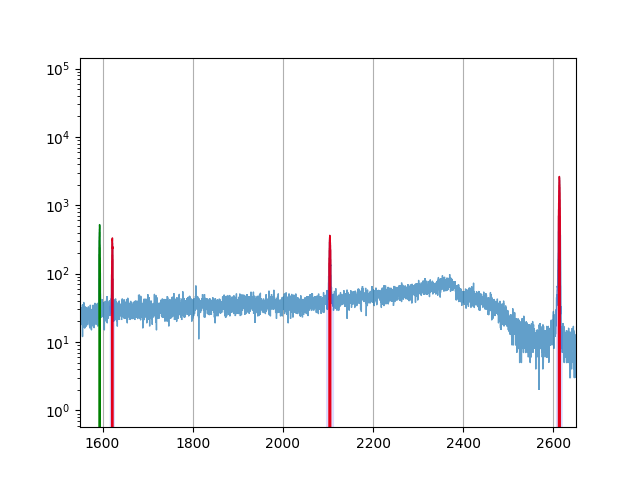

(1550.0, 2650.0)

In [9]:
plt.figure()
c,e,p=plt.hist(coll_tot.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')
plt.xlim(1550,2650)

In [10]:
mu=pars_opt_DEP['mu'][0]
sigma=pars_opt_DEP['sigma'][0]
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-hwhm_DEP),cutmax=np.ceil(mu+hwhm_DEP)).get_energies(), bins=calVec, histtype='step', alpha=1,color='g',fill=True)
print(str(np.floor(mu-hwhm_DEP))+' , '+str(np.ceil(mu+hwhm_DEP))+'     endMSE: '+str(np.floor(mu-4*sigma))+' , '+str(np.ceil(mu+4*sigma)))

mu=pars_opt_FEP_Bi['mu'][0]
sigma=pars_opt_FEP_Bi['sigma'][0]
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-hwhm_FEP_Bi),cutmax=np.ceil(mu+hwhm_FEP_Bi)).get_energies(), bins=calVec, histtype='step', alpha=1,color='r',fill=True)
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-5*sigma),cutmax=np.ceil(mu+5*sigma)).get_energies(), bins=calVec, histtype='step', alpha=0.1,color='b',fill=True)
print(str(np.floor(mu-hwhm_FEP_Bi))+' , '+str(np.ceil(mu+hwhm_FEP_Bi))+'     endSSE: '+str(np.floor(mu-4*sigma))+' , '+str(np.ceil(mu+4*sigma)))

mu=pars_opt_SEP['mu'][0]
sigma=pars_opt_SEP['sigma'][0]
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-hwhm_SEP),cutmax=np.ceil(mu+hwhm_SEP)).get_energies(), bins=calVec, histtype='step', alpha=1,color='r',fill=True)
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-5*sigma),cutmax=np.ceil(mu+5*sigma)).get_energies(), bins=calVec, histtype='step', alpha=0.1,color='b',fill=True)
print(str(np.floor(mu-hwhm_SEP))+' , '+str(np.ceil(mu+hwhm_SEP))+'     endSSE: '+str(np.floor(mu-4*sigma))+' , '+str(np.ceil(mu+4*sigma)))

mu=pars_opt_FEP_208Tl['mu'][0]
sigma=pars_opt_FEP_208Tl['sigma'][0]
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-hwhm_FEP_208Tl),cutmax=np.ceil(mu+hwhm_FEP_208Tl)).get_energies(), bins=calVec, histtype='step', alpha=1,color='r',fill=True)
plt.hist(coll_tot.subset('energy',cutmin=np.floor(mu-5*sigma),cutmax=np.ceil(mu+5*sigma)).get_energies(), bins=calVec, histtype='step', alpha=0.1,color='b',fill=True)
print(str(np.floor(mu-hwhm_FEP_208Tl))+' , '+str(np.ceil(mu+hwhm_FEP_208Tl))+'     endSSE: '+str(np.floor(mu-4*sigma))+' , '+str(np.ceil(mu+4*sigma)))

#plt.hist(coll_tot.subset('energy',2400,2600).get_energies(), bins=calVec, histtype='step', alpha=1,color='r',fill=True)
#plt.hist(coll_tot.subset('energy',2300,2375).get_energies(), bins=calVec, histtype='step', alpha=1,color='g',fill=True)

1592.0 , 1595.0     endMSE: 1590.0 , 1597.0
1620.0 , 1623.0     endSSE: 1618.0 , 1626.0
2102.0 , 2106.0     endSSE: 2098.0 , 2110.0
2611.0 , 2615.0     endSSE: 2608.0 , 2618.0


In [11]:
#Let's do the cut

coll_SSE=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2)).subset('energy',1550)
coll_MSE=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2)).subset('energy',1550)

<IPython.core.display.Javascript object>


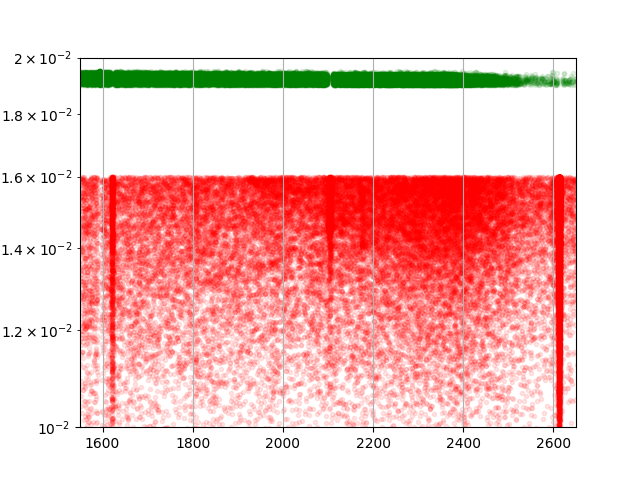

(0.01, 0.02)

In [12]:
plt.figure()
#c,e,p=plt.hist(coll_tot.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.scatter(coll_SSE.get_energies(),coll_SSE.get_avse(),color='g',marker='.', alpha=0.1)
plt.scatter(coll_MSE.get_energies(),coll_MSE.get_avse(),color='r',marker='.', alpha=0.1)
plt.semilogy()
plt.grid(axis='x')
plt.xlim(1550,2650)
plt.ylim(1e-2,2.e-2)

In [13]:
coll_SSE2=((coll.subset('energy',0,1618)+coll.subset('energy',1626,2098)+coll.subset('energy',2110,2608)+coll.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2)).subset('energy',1550)
coll_MSE2=((coll.subset('energy',0,1590)+coll.subset('energy',1597)).subset('ae',0,1.6e-2)).subset('energy',1550)

<IPython.core.display.Javascript object>


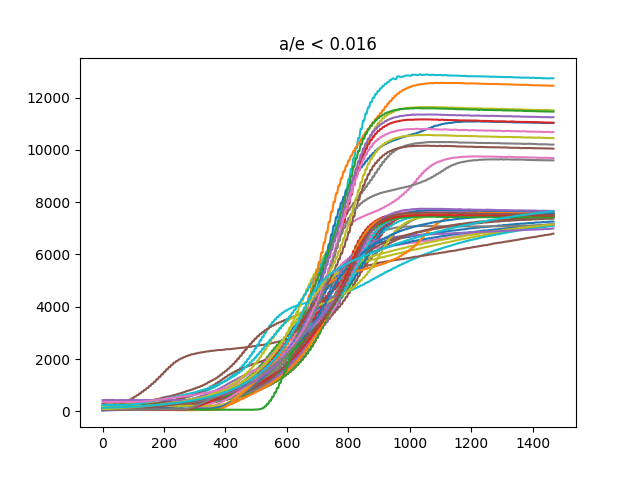

Text(0.5, 1.0, 'a/e < 0.016')

In [14]:
#Expected mostly MSE
trace=coll_MSE2.get_traces()
plt.figure()
space=np.arange(0,len(trace[0]),1)*4

for i in range(50):
    plt.plot(space,trace[i,:])

plt.title('a/e < 0.016')

<IPython.core.display.Javascript object>


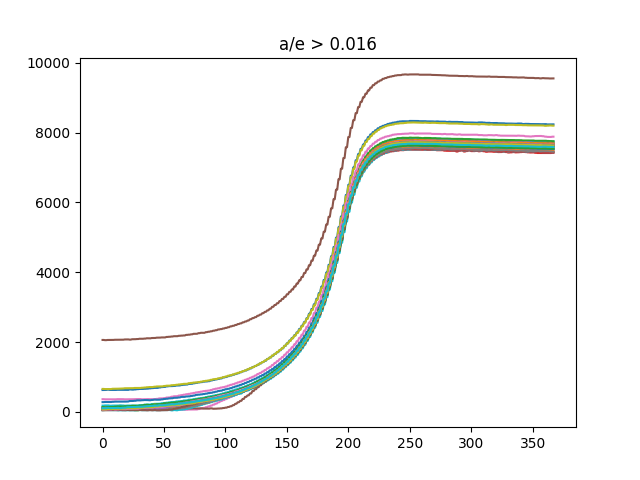

Text(0.5, 1.0, 'a/e > 0.016')

In [15]:
#Expected mostly SSE
trace=coll_SSE2.get_traces()
plt.figure()
for i in range(50):
    plt.plot(trace[i,:])

plt.title('a/e > 0.016')